In [1]:
import pandas as pd
import numpy as np
import json
from covid_19 import COVID_19_JHU, COVID_19_NYT, COVID_19_SFC, COVID_19_JHU_US
import matplotlib.pyplot as plt

pd.options.display.max_rows = 100

# Data Sources
- JHU
    - repo: https://github.com/CSSEGISandData/COVID-19
    - directories: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
- SFC
    - map: https://projects.sfchronicle.com/2020/coronavirus-map/
    - data: https://sfc-project-files.s3.amazonaws.com/project-feeds/covid19_us_cases_ca_by_county_.json
- NYT
    - raw data: https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
    - repo: https://github.com/nytimes/covid-19-data

# Sample Loading
- choose a function corresponding to the data source
    - note: SFC data was no longer supported at some point, and the structure changed frequently
- JHU data has had occasional errors in reporting
- for the sample we will use the NYT data

### Advanced Note on the Code
- these data loading processes (e.g. COVID_19_NYT) are declared with a parent class of Process
- the Process class was my initial attempt at a uniform way to automate data loading and pushing to a database
- the python script was setup in a way to be used in automated tasks
- if you wish to use the database pushing functionality please look at the code and fill in the necessary database information
    - the processes assume there is a sql query to handle the creation of the table being pushed to, if it does not exist

In [2]:
df_nyt = COVID_19_NYT(use_backend = False).process()

In [3]:
df_nyt.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0


In [5]:
df_nyt.tail()

,date,county,state,fips,cases,deaths
706312,2020-11-06,Sweetwater,Wyoming,56037,681,4
706313,2020-11-06,Teton,Wyoming,56039,922,2
706314,2020-11-06,Uinta,Wyoming,56041,542,3
706315,2020-11-06,Washakie,Wyoming,56043,187,7
706316,2020-11-06,Weston,Wyoming,56045,294,1


# Exploring the Data

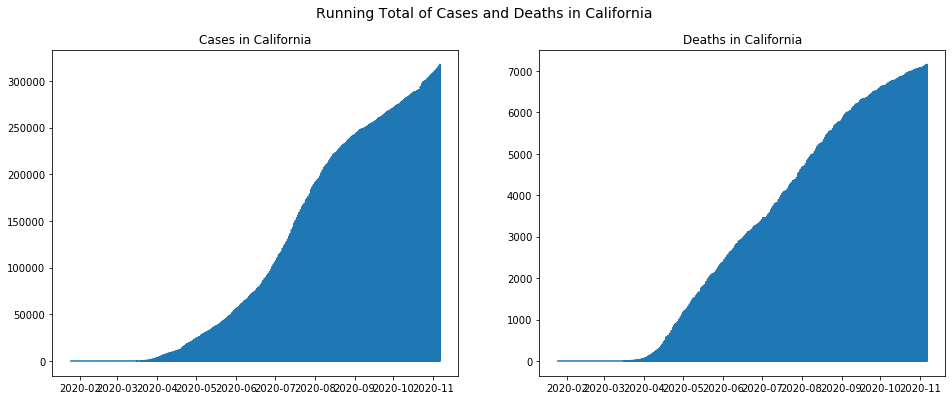

In [15]:
state = 'California'
df_state = df_nyt.loc[df_nyt['state'] == state]
df_state = df_state.dropna()

fig, ax = plt.subplots(1, 2, figsize = (16, 6))

cases_plot = ax[0].plot(df_state['date'].values, df_state['cases'].values)
deaths_plot = ax[1].plot(df_state['date'].values, df_state['deaths'].values)

fig_title = 'Running Total of Cases and Deaths in {}'.format(state)
fig.suptitle(fig_title, fontsize = 14)

ax[0].set_title('Cases in {}'.format(state))
ax[1].set_title('Deaths in {}'.format(state))
plt.show()

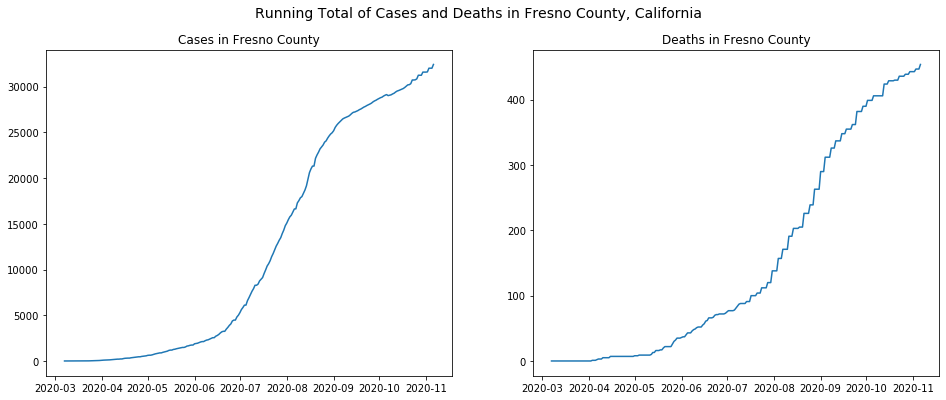

In [17]:
state = 'California'
county = 'Fresno'
condition = (df_nyt['state'] == state) & (df_nyt['county'] == county)
df_county = df_nyt.loc[condition]
df_county = df_county.dropna()

fig, ax = plt.subplots(1, 2, figsize = (16, 6))

cases_plot = ax[0].plot(df_county['date'].values, df_county['cases'].values)
deaths_plot = ax[1].plot(df_county['date'].values, df_county['deaths'].values)

fig_title = 'Running Total of Cases and Deaths in {} County, {}'.format(county, state)
fig.suptitle(fig_title, fontsize = 14)

ax[0].set_title('Cases in {} County'.format(county))
ax[1].set_title('Deaths in {} County'.format(county))
plt.show()